<a href="https://colab.research.google.com/github/nsprabha/neurological_disorder/blob/main/updated3_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/drive/MyDrive/mri_dataset_balanced/content/mri_dataset_balanced"
img_size = (96, 96)
batch_size = 64

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path, target_size=img_size, batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False
)

num_classes = len(train_generator.class_indices)
input_shape = (96, 96, 3)


Found 6871 images belonging to 7 classes.
Found 1716 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models

def build_model_1(input_shape, num_classes):
    return models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

def build_model_2(input_shape, num_classes):
    return models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

def build_model_3(input_shape, num_classes):
    return models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])


In [ ]:
import time

def train_and_save(model_fn, name):
    model = model_fn(input_shape, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    model.fit(train_generator, validation_data=val_generator, epochs=3)
    end = time.time()

    model.save(f"/content/drive/MyDrive/{name}.h5")
    print(f"✅ {name} saved! 🕒 {end - start:.2f}s")

train_and_save(build_model_1, "cnn_model_1")
train_and_save(build_model_2, "cnn_model_2")
train_and_save(build_model_3, "cnn_model_3")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 638s 6s/step - accuracy: 0.3782 - loss: 2.2565 - val_accuracy: 0.6876 - val_loss: 0.8282
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 313ms/step - accuracy: 0.8340 - loss: 0.4743 - val_accuracy: 0.7150 - val_loss: 0.6820
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 317ms/step - accuracy: 0.9177 - loss: 0.2433 - val_accuracy: 0.7733 - val_loss: 0.6329


✅ cnn_model_1 saved! 🕒 722.27s
Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 56s 392ms/step - accuracy: 0.3188 - loss: 4.6243 - val_accuracy: 0.6195 - val_loss: 0.9319
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - accuracy: 0.7937 - loss: 0.5406 - val_accuracy: 0.6876 - val_loss: 0.7295
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 320ms/step - accuracy: 0.8960 - loss: 0.2931 - val_accuracy: 0.7599 - val_loss: 0.6118


✅ cnn_model_2 saved! 🕒 131.18s
Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 378ms/step - accuracy: 0.1967 - loss: 11.3058 - val_accuracy: 0.2902 - val_loss: 11.0809
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.2601 - loss: 11.8793 - val_accuracy: 0.3042 - val_loss: 10.7453
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 315ms/step - accuracy: 0.2915 - loss: 11.3616 - val_accuracy: 0.2925 - val_loss: 11.0831


✅ cnn_model_3 saved! 🕒 122.05s


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model_path, model_name):
    print(f"\n📊 Evaluating: {model_name}")
    model = tf.keras.models.load_model(model_path)

    loss, acc = model.evaluate(val_generator, verbose=0)
    print(f"✅ Accuracy: {acc*100:.2f}%")

    y_true = val_generator.classes
    y_probs = model.predict(val_generator)
    y_pred = np.argmax(y_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=val_generator.class_indices.keys(),
                yticklabels=val_generator.class_indices.keys())
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    report = classification_report(y_true, y_pred, output_dict=True)
    print(pd.DataFrame(report).transpose())



📊 Evaluating: Model 1


✅ Accuracy: 77.33%
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step


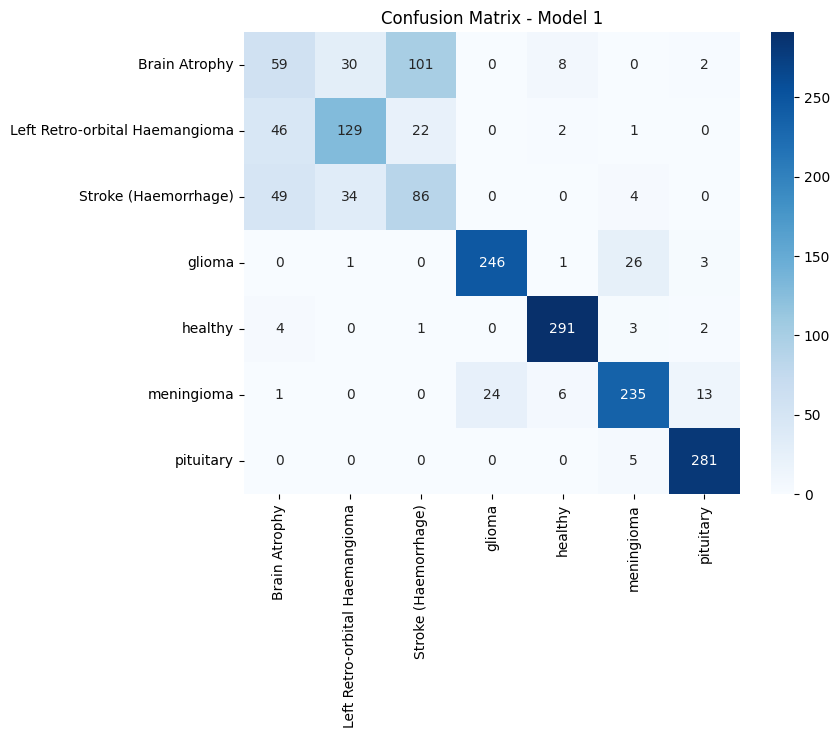

              precision    recall  f1-score     support
0              0.371069  0.295000  0.328691   200.00000
1              0.664948  0.645000  0.654822   200.00000
2              0.409524  0.497110  0.449086   173.00000
3              0.911111  0.888087  0.899452   277.00000
4              0.944805  0.966777  0.955665   301.00000
5              0.857664  0.842294  0.849910   279.00000
6              0.933555  0.982517  0.957411   286.00000
accuracy       0.773310  0.773310  0.773310     0.77331
macro avg      0.727525  0.730969  0.727862  1716.00000
weighted avg   0.769872  0.773310  0.770479  1716.00000

📊 Evaluating: Model 2


✅ Accuracy: 75.99%
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step


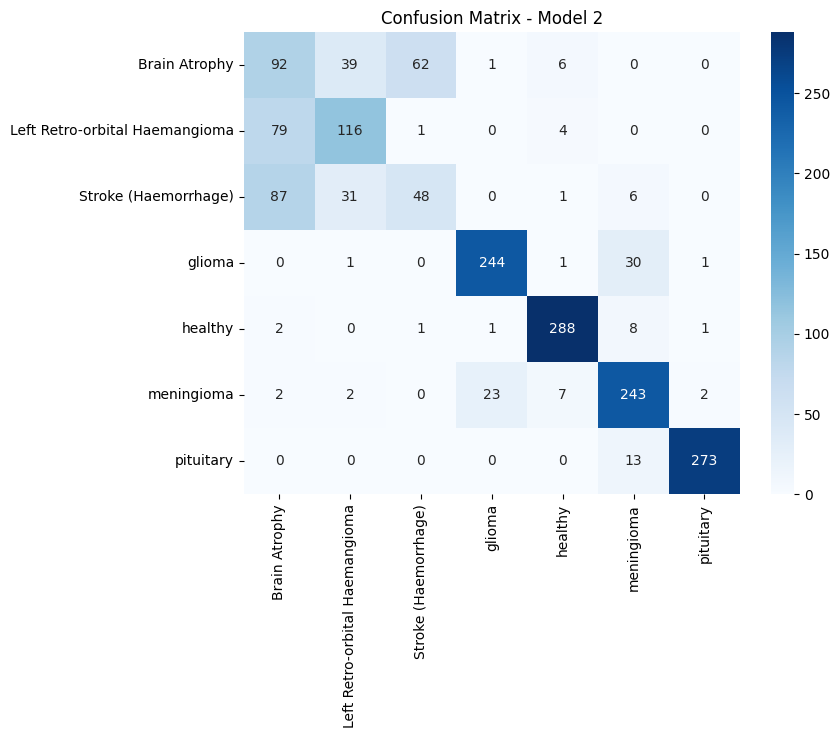

              precision    recall  f1-score      support
0              0.351145  0.460000  0.398268   200.000000
1              0.613757  0.580000  0.596401   200.000000
2              0.428571  0.277457  0.336842   173.000000
3              0.907063  0.880866  0.893773   277.000000
4              0.938111  0.956811  0.947368   301.000000
5              0.810000  0.870968  0.839378   279.000000
6              0.985560  0.954545  0.969805   286.000000
accuracy       0.759907  0.759907  0.759907     0.759907
macro avg      0.719172  0.711521  0.711691  1716.000000
weighted avg   0.762594  0.759907  0.758445  1716.000000

📊 Evaluating: Model 3


✅ Accuracy: 29.25%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step


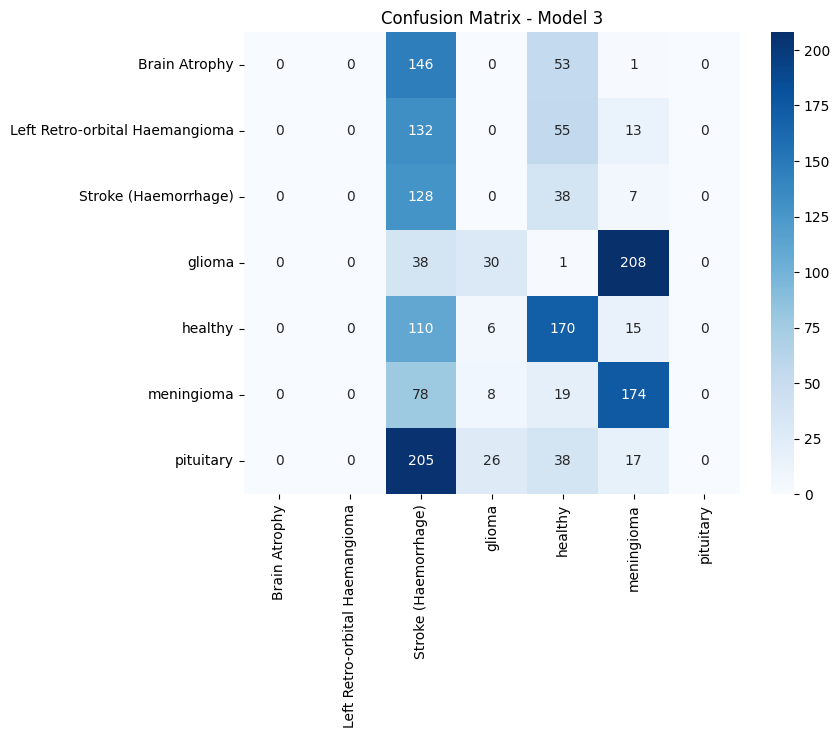

              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   200.000000
1              0.000000  0.000000  0.000000   200.000000
2              0.152927  0.739884  0.253465   173.000000
3              0.428571  0.108303  0.172911   277.000000
4              0.454545  0.564784  0.503704   301.000000
5              0.400000  0.623656  0.487395   279.000000
6              0.000000  0.000000  0.000000   286.000000
accuracy       0.292541  0.292541  0.292541     0.292541
macro avg      0.205149  0.290947  0.202496  1716.000000
weighted avg   0.229364  0.292541  0.221063  1716.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_1.h5", "Model 1")
evaluate_model("/content/drive/MyDrive/cnn_model_2.h5", "Model 2")
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3")


In [ ]:
def build_model_3(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),  # lower dropout to avoid underfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
train_and_save(build_model_3, "cnn_model_3")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 401ms/step - accuracy: 0.3868 - loss: 8.0131 - val_accuracy: 0.3083 - val_loss: 9.9431
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 323ms/step - accuracy: 0.5635 - loss: 6.3083 - val_accuracy: 0.2646 - val_loss: 11.1186
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.6159 - loss: 5.2494 - val_accuracy: 0.3258 - val_loss: 3.9667


✅ cnn_model_3 saved! 🕒 124.57s



📊 Evaluating: Model 3


✅ Accuracy: 32.58%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step


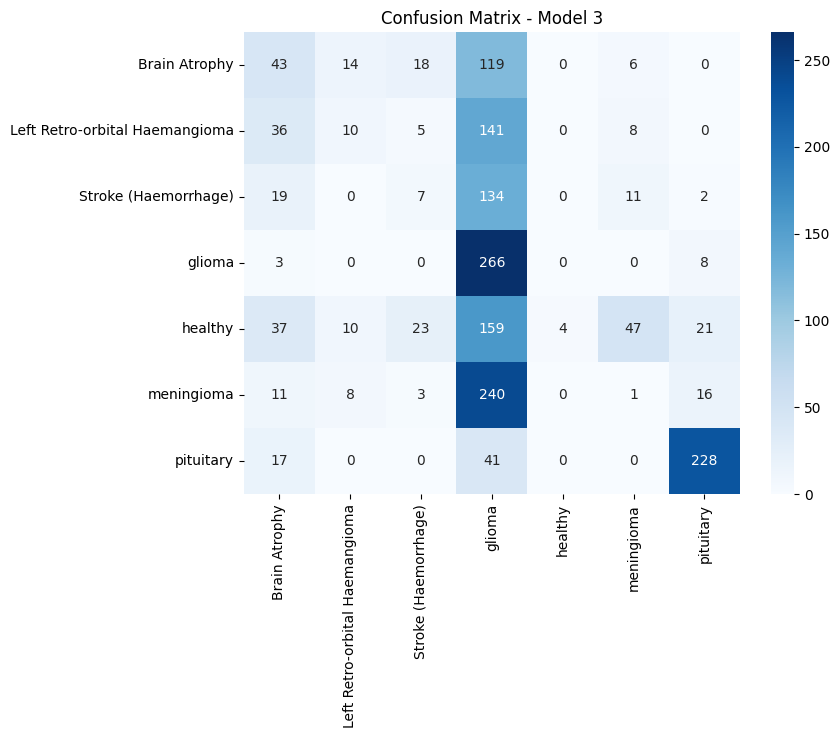

              precision    recall  f1-score      support
0              0.259036  0.215000  0.234973   200.000000
1              0.238095  0.050000  0.082645   200.000000
2              0.125000  0.040462  0.061135   173.000000
3              0.241818  0.960289  0.386347   277.000000
4              1.000000  0.013289  0.026230   301.000000
5              0.013699  0.003584  0.005682   279.000000
6              0.829091  0.797203  0.812834   286.000000
accuracy       0.325758  0.325758  0.325758     0.325758
macro avg      0.386677  0.297118  0.229978  1716.000000
weighted avg   0.425394  0.325758  0.246544  1716.000000


In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3")


In [ ]:
def build_model_3(input_shape, num_classes):
    from tensorflow.keras import layers, models

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
train_and_save(build_model_3, "cnn_model_3")  # This will overwrite the old .h5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - accuracy: 0.3361 - loss: 8.5088 - val_accuracy: 0.2092 - val_loss: 12.6155
Epoch 2/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - accuracy: 0.4373 - loss: 9.0018 - val_accuracy: 0.3438 - val_loss: 10.4217
Epoch 3/3
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 322ms/step - accuracy: 0.4373 - loss: 9.0138 - val_accuracy: 0.4674 - val_loss: 8.5377


✅ cnn_model_3 saved! 🕒 119.05s



📊 Evaluating: Model 3


✅ Accuracy: 46.74%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step


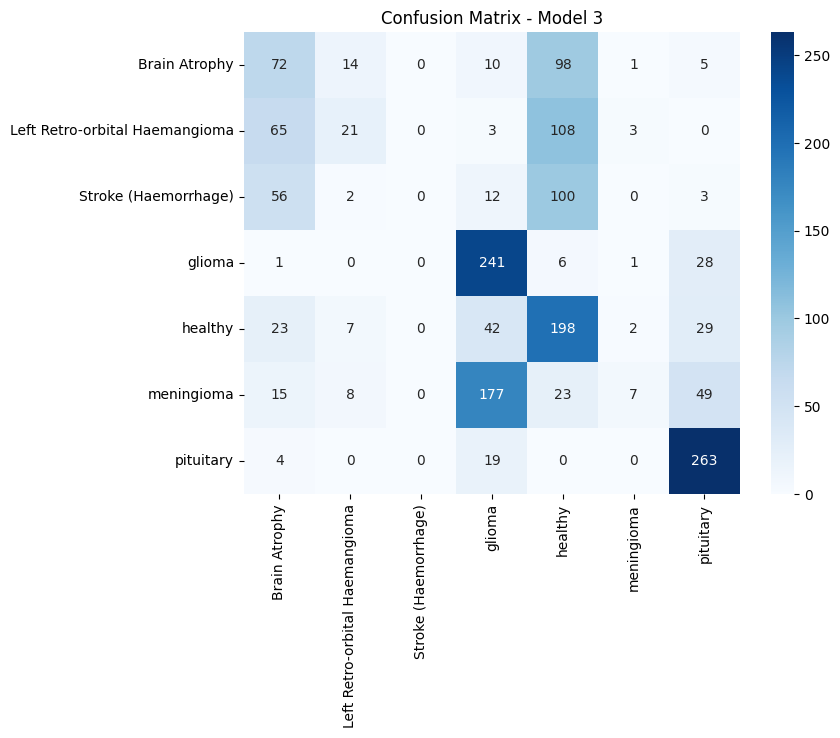

              precision    recall  f1-score      support
0              0.305085  0.360000  0.330275   200.000000
1              0.403846  0.105000  0.166667   200.000000
2              0.000000  0.000000  0.000000   173.000000
3              0.478175  0.870036  0.617157   277.000000
4              0.371482  0.657807  0.474820   301.000000
5              0.500000  0.025090  0.047782   279.000000
6              0.697613  0.919580  0.793363   286.000000
accuracy       0.467366  0.467366  0.467366     0.467366
macro avg      0.393743  0.419645  0.347152  1716.000000
weighted avg   0.422537  0.467366  0.380825  1716.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3")


In [ ]:
from tensorflow.keras import layers, models

def build_model_3(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
model_3 = build_model_3(input_shape, num_classes)

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

model_3.fit(train_generator,
            validation_data=val_generator,
            epochs=10,
            callbacks=[early_stop])


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 54s 390ms/step - accuracy: 0.4820 - loss: 1.9145 - val_accuracy: 0.1166 - val_loss: 2.8684
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 317ms/step - accuracy: 0.8611 - loss: 0.3828 - val_accuracy: 0.1894 - val_loss: 4.6007
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.9293 - loss: 0.1934 - val_accuracy: 0.2442 - val_loss: 2.8513
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 320ms/step - accuracy: 0.9695 - loss: 0.0999 - val_accuracy: 0.5647 - val_loss: 1.2899
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - accuracy: 0.9836 - loss: 0.0554 - val_accuracy: 0.8059 - val_loss: 0.6390
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 349ms/step - accuracy: 0.9902 - loss: 0.0399 - val_accuracy: 0.8380 - val_loss: 0.5851
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 348ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.8368 - val_loss: 0.5100
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.9924 - loss: 0

In [ ]:
model_3.save("/content/drive/MyDrive/cnn_model_3.h5")
print("✅ Model 3 saved.")


✅ Model 3 saved.



📊 Evaluating: Model 3


✅ Accuracy: 86.60%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step


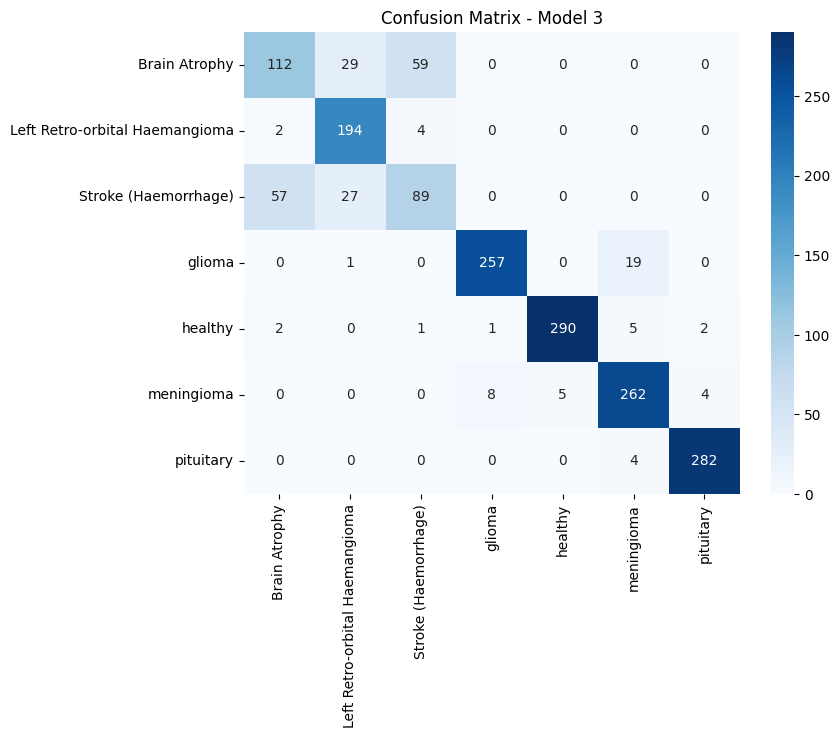

              precision    recall  f1-score      support
0              0.647399  0.560000  0.600536   200.000000
1              0.772908  0.970000  0.860310   200.000000
2              0.581699  0.514451  0.546012   173.000000
3              0.966165  0.927798  0.946593   277.000000
4              0.983051  0.963455  0.973154   301.000000
5              0.903448  0.939068  0.920914   279.000000
6              0.979167  0.986014  0.982578   286.000000
accuracy       0.865967  0.865967  0.865967     0.865967
macro avg      0.833405  0.837255  0.832871  1716.000000
weighted avg   0.862660  0.865967  0.862300  1716.000000


In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3")


In [ ]:
def build_model_1(input_shape, num_classes):
    from tensorflow.keras import layers, models
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
def build_model_2(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def train_and_save(model_fn, name):
    model = model_fn(input_shape, num_classes)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

    model.fit(train_generator,
              validation_data=val_generator,
              epochs=10,
              callbacks=[early_stop],
              verbose=1)

    model.save(f"/content/drive/MyDrive/{name}.h5")
    print(f"✅ {name} saved successfully.")


In [ ]:
train_and_save(build_model_1, "cnn_model_1")
train_and_save(build_model_2, "cnn_model_2")
train_and_save(build_model_3, "cnn_model_3")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 376ms/step - accuracy: 0.3527 - loss: 1.6398 - val_accuracy: 0.5542 - val_loss: 1.0775
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.6195 - loss: 0.9906 - val_accuracy: 0.6334 - val_loss: 0.8858
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 356ms/step - accuracy: 0.7046 - loss: 0.8045 - val_accuracy: 0.6620 - val_loss: 0.8076
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 315ms/step - accuracy: 0.7472 - loss: 0.6930 - val_accuracy: 0.6970 - val_loss: 0.8152
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 313ms/step - accuracy: 0.7758 - loss: 0.6300 - val_accuracy: 0.7331 - val_loss: 0.7116
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.7993 - loss: 0.5509 - val_accuracy: 0.7110 - val_loss: 0.8056
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.8127 - loss: 0.5167 - val_accuracy: 0.7348 - val_loss: 0.7363
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - accuracy: 0.8326 - loss: 0

✅ cnn_model_1 saved successfully.
Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 364ms/step - accuracy: 0.3533 - loss: 2.7616 - val_accuracy: 0.1783 - val_loss: 1.8812
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.6946 - loss: 0.7789 - val_accuracy: 0.2716 - val_loss: 1.7826
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - accuracy: 0.7623 - loss: 0.6166 - val_accuracy: 0.4347 - val_loss: 1.3320
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.7957 - loss: 0.5214 - val_accuracy: 0.7086 - val_loss: 0.7667
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.8310 - loss: 0.4387 - val_accuracy: 0.7535 - val_loss: 0.5816
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 344ms/step - accuracy: 0.8600 - loss: 0.3625 - val_accuracy: 0.7692 - val_loss: 0.5671
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - accuracy: 0.8832 - loss: 0.3169 - val_accuracy: 0.8019 - val_loss: 0.5085
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 317ms

✅ cnn_model_2 saved successfully.
Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 378ms/step - accuracy: 0.5094 - loss: 1.8162 - val_accuracy: 0.2786 - val_loss: 2.6157
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 315ms/step - accuracy: 0.8636 - loss: 0.3587 - val_accuracy: 0.2523 - val_loss: 3.0417
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.9371 - loss: 0.1763 - val_accuracy: 0.3928 - val_loss: 2.3569
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.9689 - loss: 0.0958 - val_accuracy: 0.6002 - val_loss: 1.3204
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.9803 - loss: 0.0598 - val_accuracy: 0.8205 - val_loss: 0.5470
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - accuracy: 0.9930 - loss: 0.0285 - val_accuracy: 0.8333 - val_loss: 0.4949
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - accuracy: 0.9938 - loss: 0.0245 - val_accuracy: 0.8537 - val_loss: 0.4216
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms

✅ cnn_model_3 saved successfully.



📊 Evaluating: Model 1
✅ Accuracy: 75.23%
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step


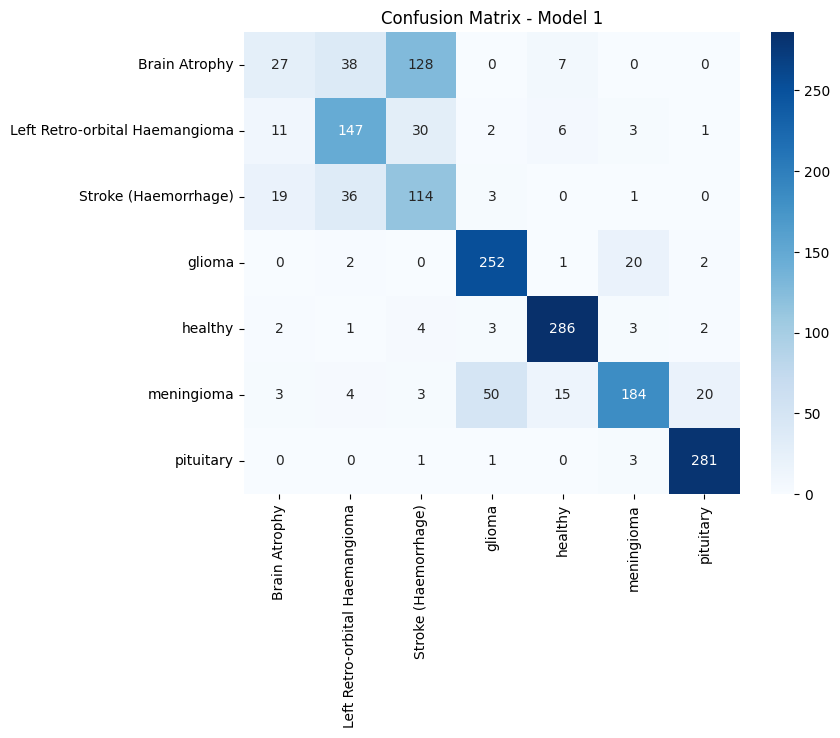

              precision    recall  f1-score      support
0              0.435484  0.135000  0.206107   200.000000
1              0.644737  0.735000  0.686916   200.000000
2              0.407143  0.658960  0.503311   173.000000
3              0.810289  0.909747  0.857143   277.000000
4              0.907937  0.950166  0.928571   301.000000
5              0.859813  0.659498  0.746450   279.000000
6              0.918301  0.982517  0.949324   286.000000
accuracy       0.752331  0.752331  0.752331     0.752331
macro avg      0.711958  0.718698  0.696832  1716.000000
weighted avg   0.749849  0.752331  0.735648  1716.000000

📊 Evaluating: Model 2


✅ Accuracy: 80.19%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step


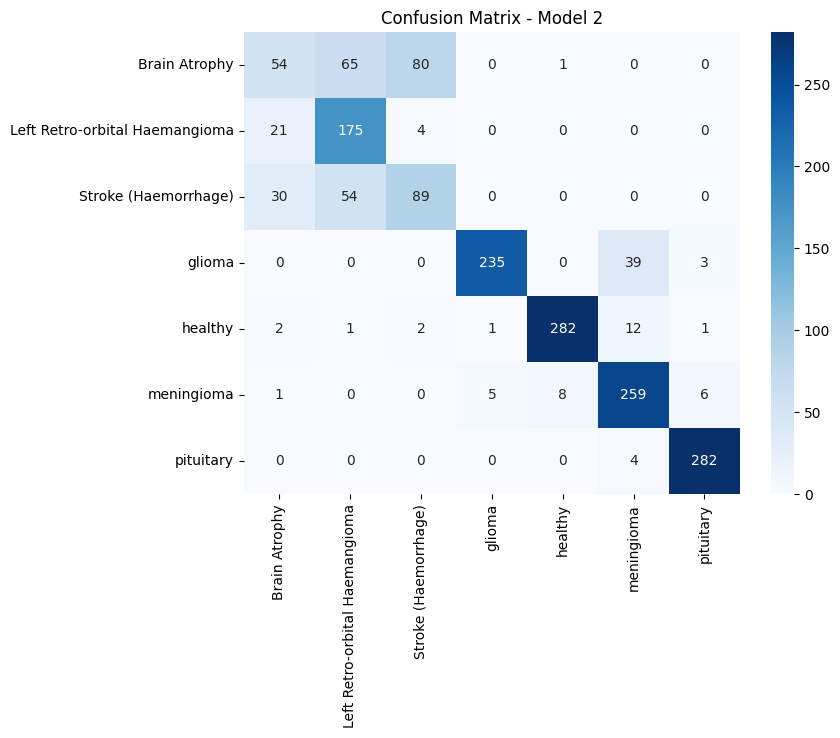

              precision    recall  f1-score      support
0              0.500000  0.270000  0.350649   200.000000
1              0.593220  0.875000  0.707071   200.000000
2              0.508571  0.514451  0.511494   173.000000
3              0.975104  0.848375  0.907336   277.000000
4              0.969072  0.936877  0.952703   301.000000
5              0.824841  0.928315  0.873524   279.000000
6              0.965753  0.986014  0.975779   286.000000
accuracy       0.801865  0.801865  0.801865     0.801865
macro avg      0.762366  0.765576  0.754079  1716.000000
weighted avg   0.801141  0.801865  0.793073  1716.000000

📊 Evaluating: Model 3


✅ Accuracy: 85.55%
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step


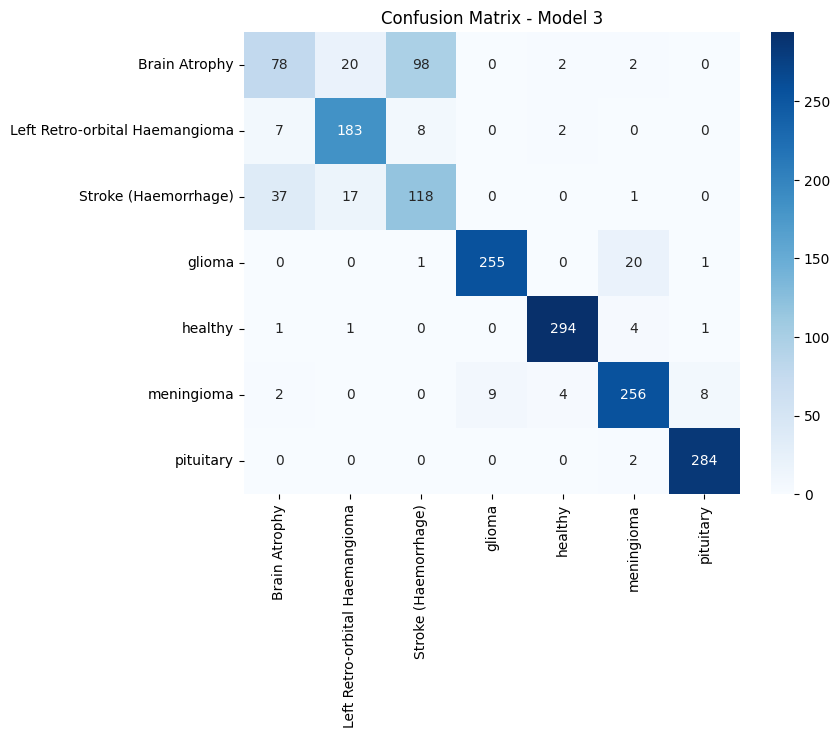

              precision    recall  f1-score      support
0              0.624000  0.390000  0.480000   200.000000
1              0.828054  0.915000  0.869359   200.000000
2              0.524444  0.682081  0.592965   173.000000
3              0.965909  0.920578  0.942699   277.000000
4              0.973510  0.976744  0.975124   301.000000
5              0.898246  0.917563  0.907801   279.000000
6              0.965986  0.993007  0.979310   286.000000
accuracy       0.855478  0.855478  0.855478     0.855478
macro avg      0.825736  0.827853  0.821037  1716.000000
weighted avg   0.855831  0.855478  0.851080  1716.000000


In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_1.h5", "Model 1")
evaluate_model("/content/drive/MyDrive/cnn_model_2.h5", "Model 2")
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3")


In [ ]:
def evaluate_model(model_path, model_name, val_generator, num_images=9):
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import time
    from sklearn.metrics import classification_report, confusion_matrix
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    class_labels = list(val_generator.class_indices.keys())
    filepaths = val_generator.filepaths
    total_samples = val_generator.samples

    print(f"\n🔍 Evaluating {model_name}")
    model = tf.keras.models.load_model(model_path)

    # ⏱️ Start timer
    start = time.time()

    # Accuracy
    loss, acc = model.evaluate(val_generator, verbose=0)
    print(f"✅ Accuracy: {acc*100:.2f}%")

    # Predict
    y_true = val_generator.classes
    y_probs = model.predict(val_generator, verbose=0)
    y_pred = np.argmax(y_probs, axis=1)

    # ⏱️ End timer
    end = time.time()
    print(f"🕒 Evaluation time: {end - start:.2f} seconds")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print("📊 Classification Report (Precision, Recall, F1-score):")
    print(df_report[['precision', 'recall', 'f1-score']])

    # Predicted Images Grid
    print(f"\n🖼️ Showing {num_images} Predicted Images from {model_name}:\n")
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        img_path = filepaths[i]
        img = load_img(img_path, target_size=(96, 96))
        arr = img_to_array(img) / 255.0
        pred = model.predict(np.expand_dims(arr, axis=0), verbose=0)
        pred_label = class_labels[np.argmax(pred)]

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Predicted: {pred_label}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()



🔍 Evaluating Model 1
✅ Accuracy: 75.23%
🕒 Evaluation time: 18.52 seconds


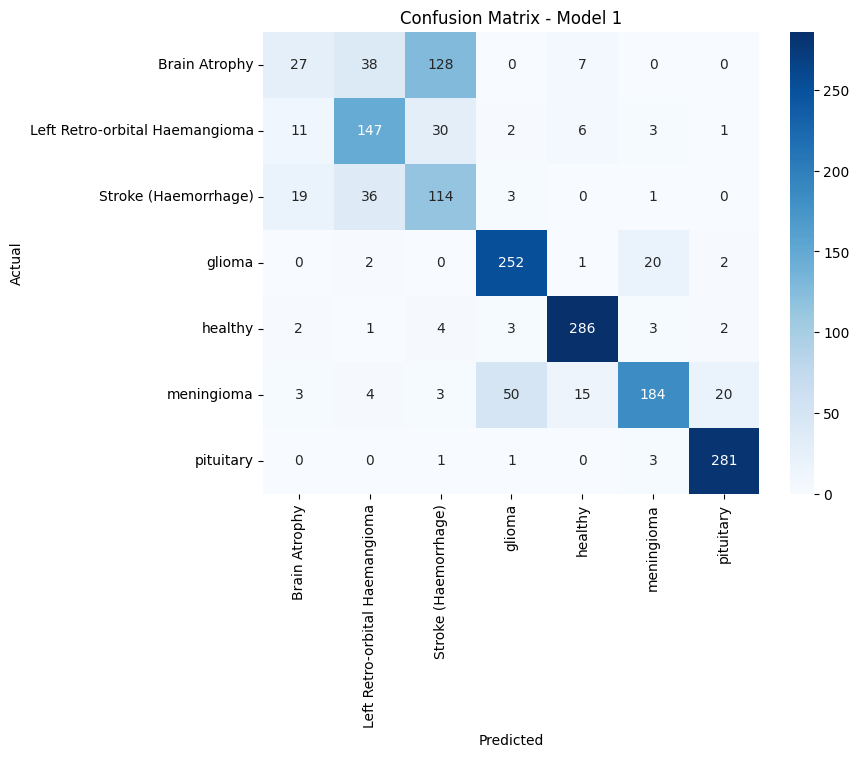

📊 Classification Report (Precision, Recall, F1-score):
                                precision    recall  f1-score
Brain Atrophy                    0.435484  0.135000  0.206107
Left Retro-orbital Haemangioma   0.644737  0.735000  0.686916
Stroke (Haemorrhage)             0.407143  0.658960  0.503311
glioma                           0.810289  0.909747  0.857143
healthy                          0.907937  0.950166  0.928571
meningioma                       0.859813  0.659498  0.746450
pituitary                        0.918301  0.982517  0.949324
accuracy                         0.752331  0.752331  0.752331
macro avg                        0.711958  0.718698  0.696832
weighted avg                     0.749849  0.752331  0.735648

🖼️ Showing 9 Predicted Images from Model 1:



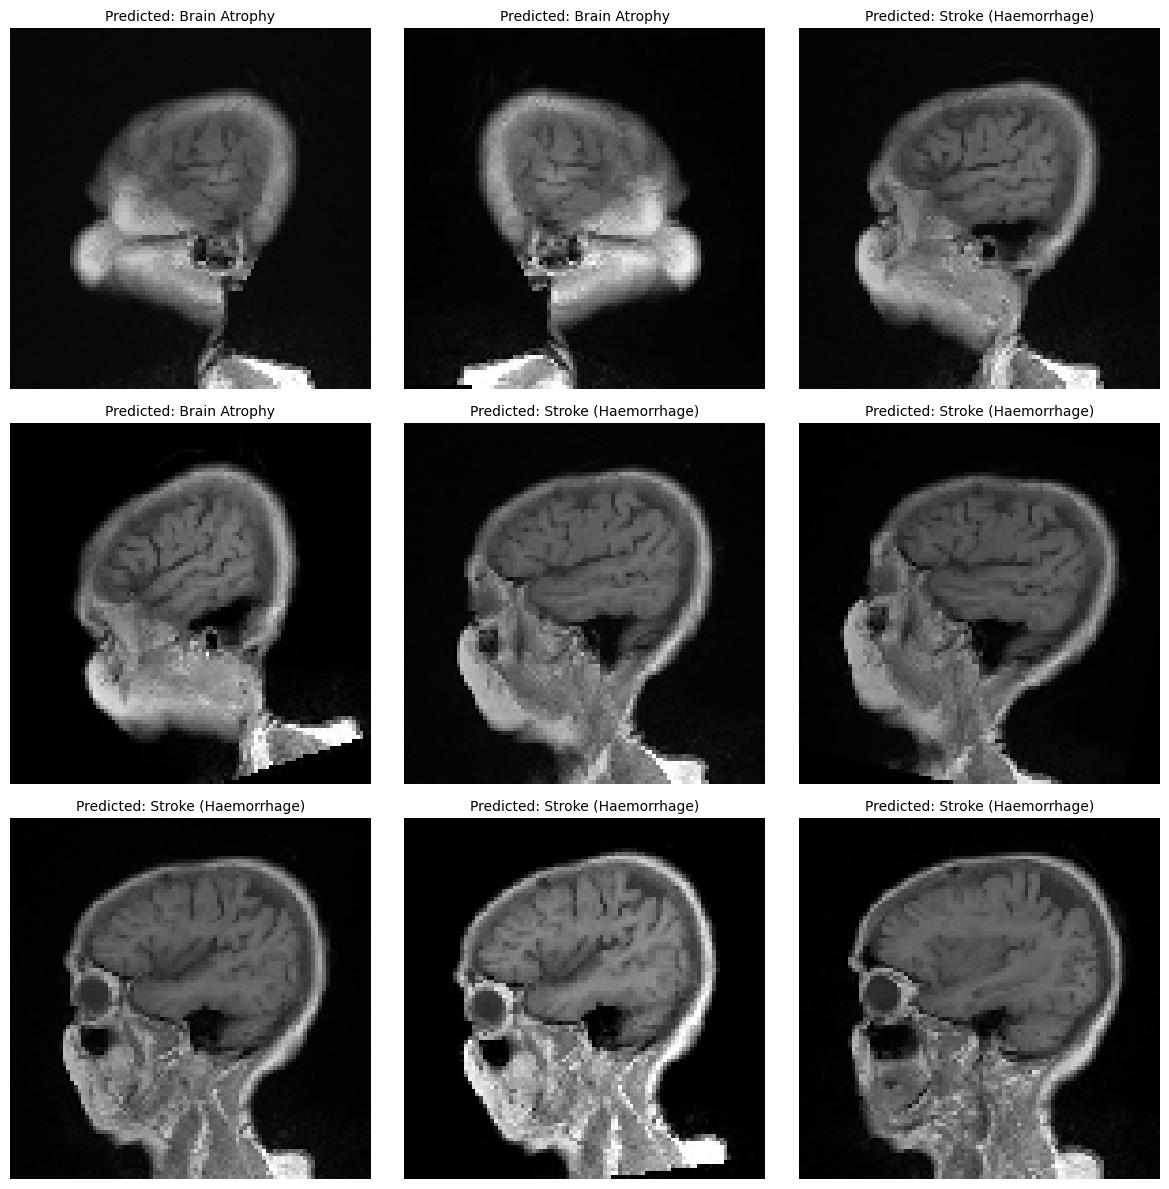


🔍 Evaluating Model 2


✅ Accuracy: 80.19%
🕒 Evaluation time: 15.86 seconds


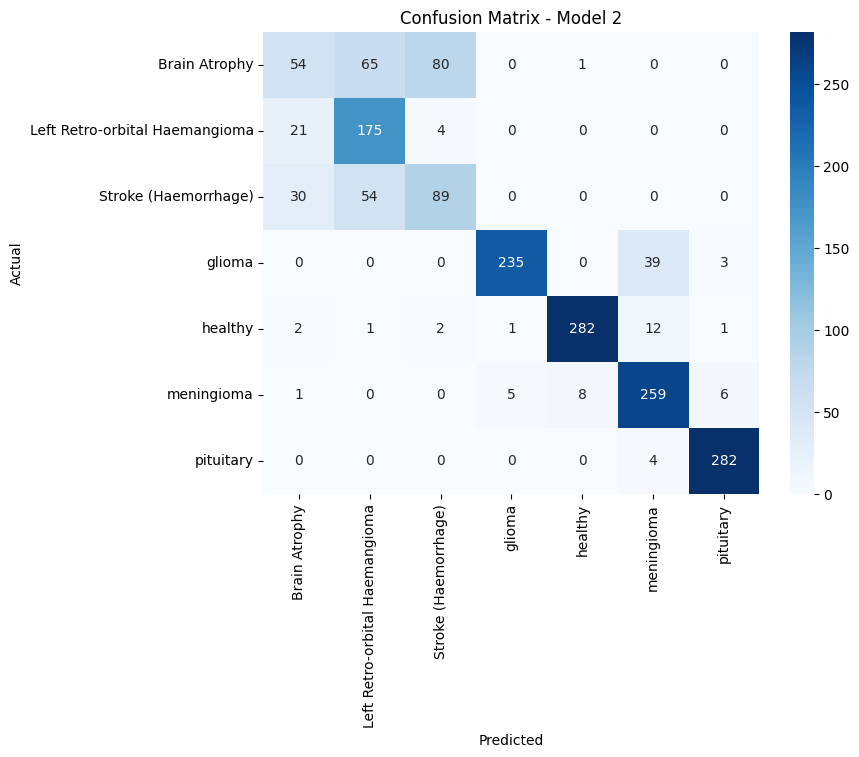

📊 Classification Report (Precision, Recall, F1-score):
                                precision    recall  f1-score
Brain Atrophy                    0.500000  0.270000  0.350649
Left Retro-orbital Haemangioma   0.593220  0.875000  0.707071
Stroke (Haemorrhage)             0.508571  0.514451  0.511494
glioma                           0.975104  0.848375  0.907336
healthy                          0.969072  0.936877  0.952703
meningioma                       0.824841  0.928315  0.873524
pituitary                        0.965753  0.986014  0.975779
accuracy                         0.801865  0.801865  0.801865
macro avg                        0.762366  0.765576  0.754079
weighted avg                     0.801141  0.801865  0.793073

🖼️ Showing 9 Predicted Images from Model 2:



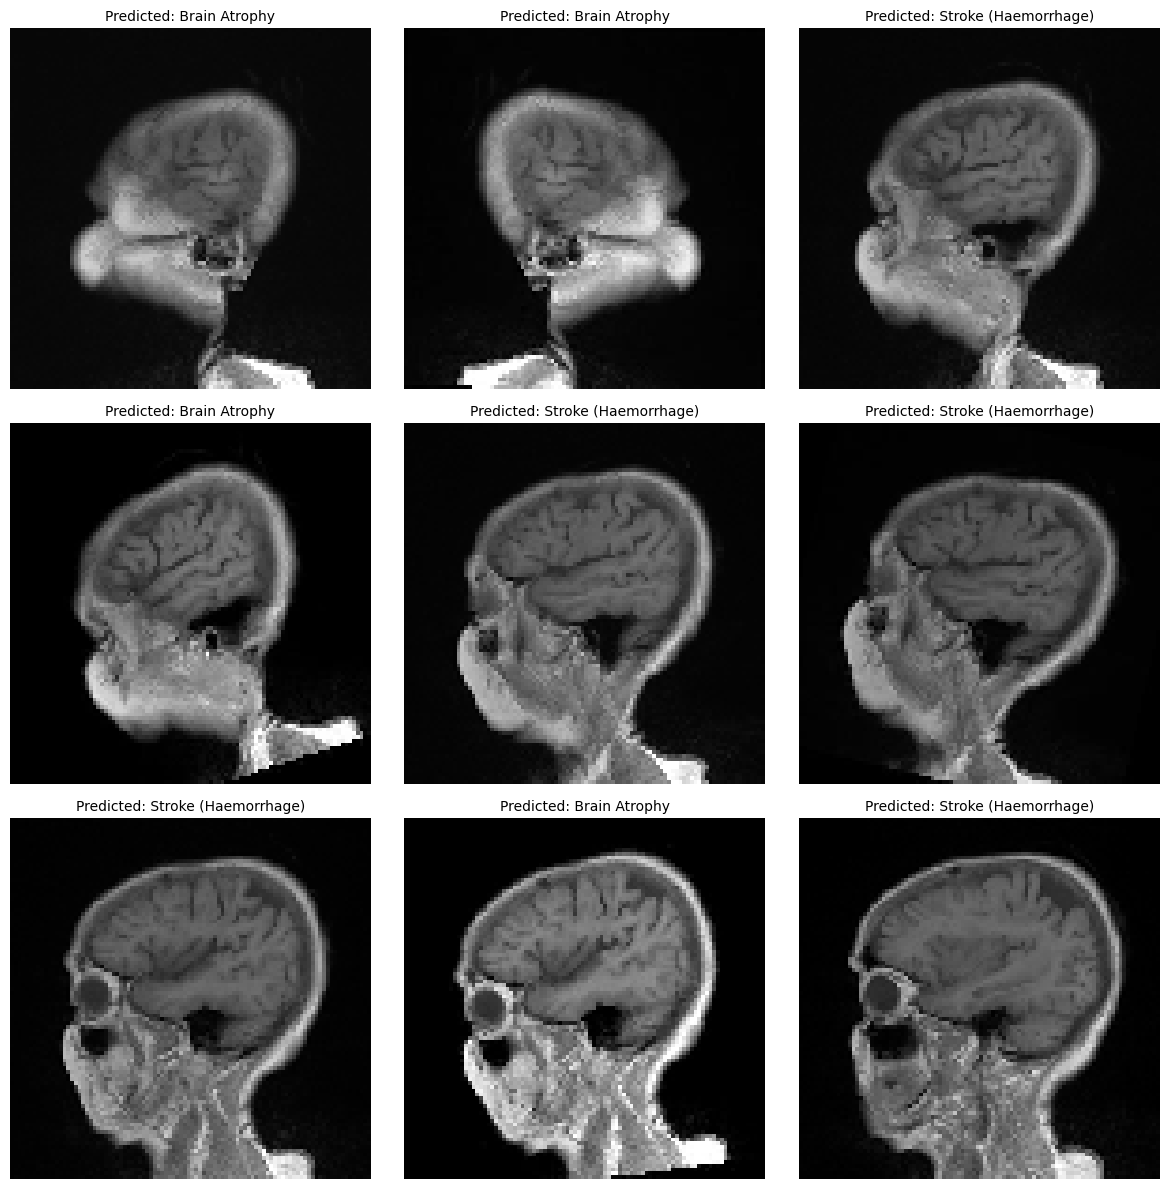


🔍 Evaluating Model 3


✅ Accuracy: 85.55%
🕒 Evaluation time: 19.37 seconds


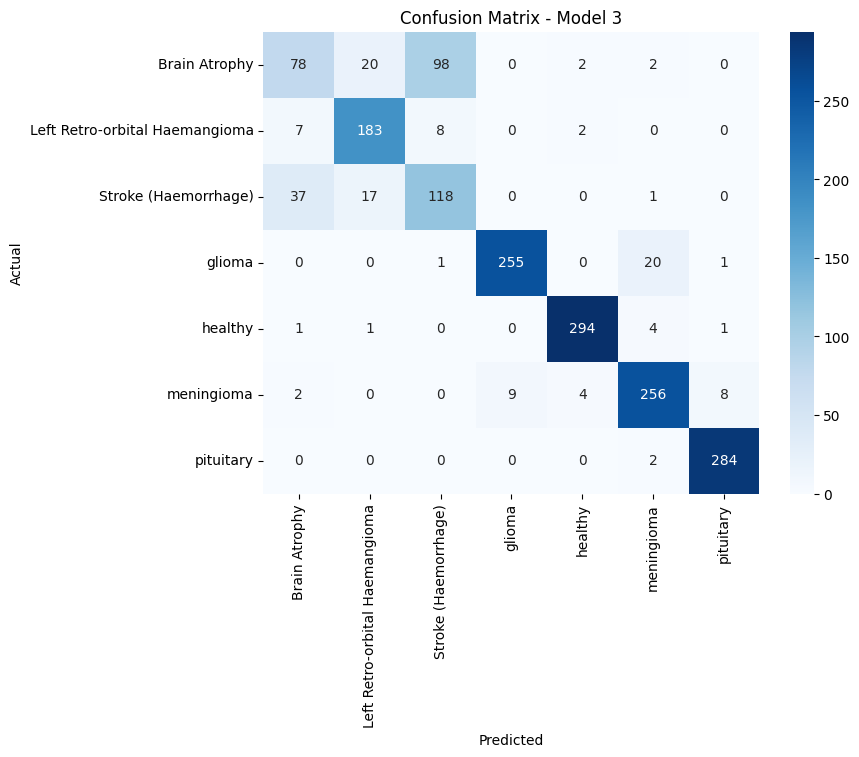

📊 Classification Report (Precision, Recall, F1-score):
                                precision    recall  f1-score
Brain Atrophy                    0.624000  0.390000  0.480000
Left Retro-orbital Haemangioma   0.828054  0.915000  0.869359
Stroke (Haemorrhage)             0.524444  0.682081  0.592965
glioma                           0.965909  0.920578  0.942699
healthy                          0.973510  0.976744  0.975124
meningioma                       0.898246  0.917563  0.907801
pituitary                        0.965986  0.993007  0.979310
accuracy                         0.855478  0.855478  0.855478
macro avg                        0.825736  0.827853  0.821037
weighted avg                     0.855831  0.855478  0.851080

🖼️ Showing 9 Predicted Images from Model 3:



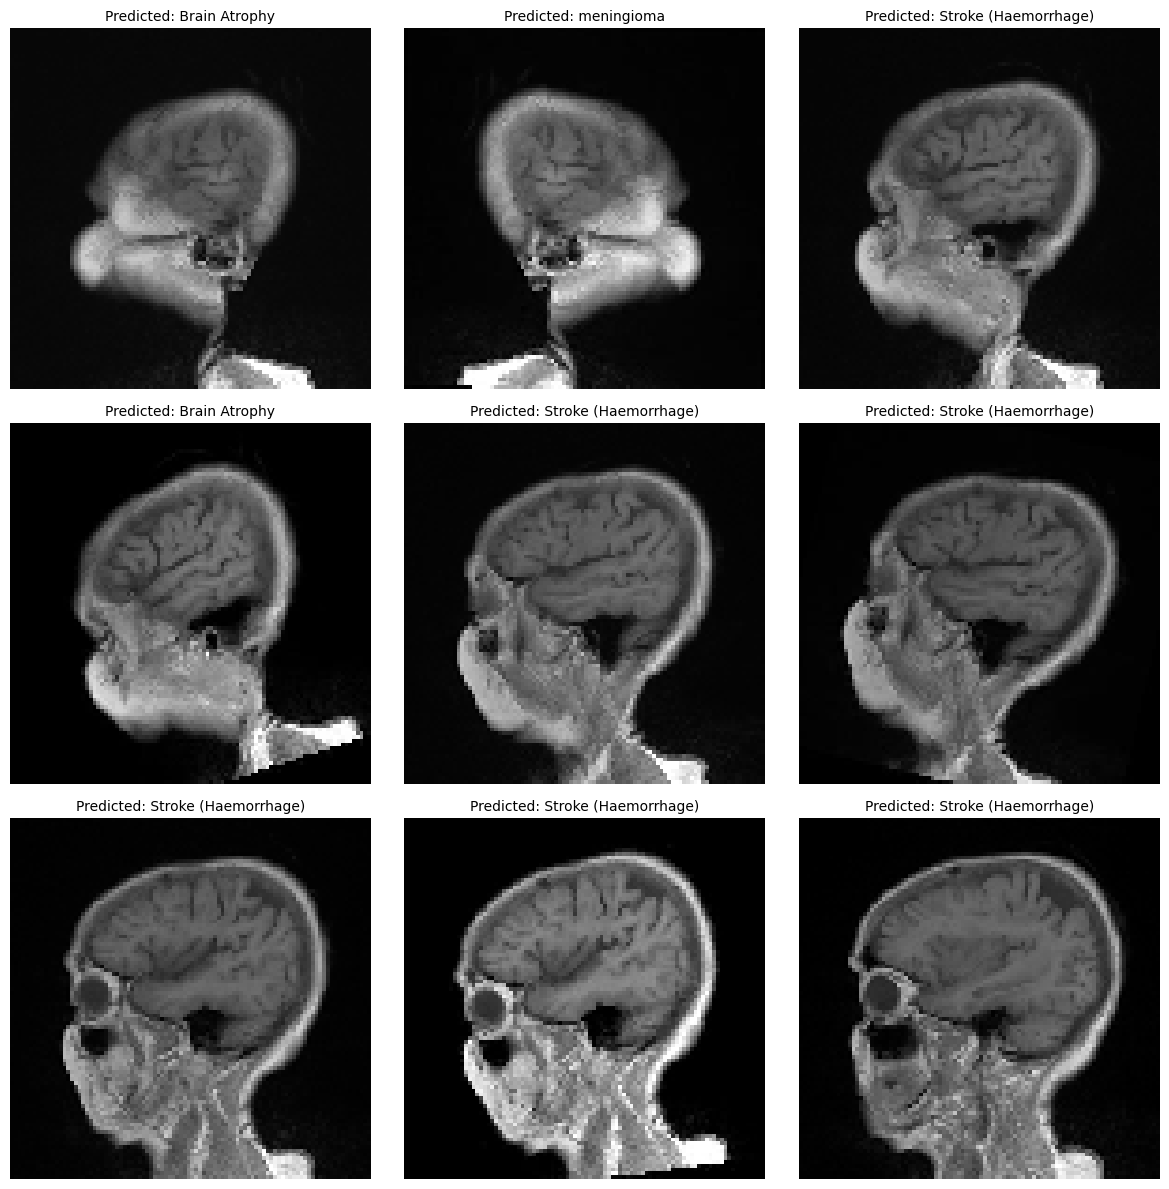

In [ ]:
evaluate_model("/content/drive/MyDrive/cnn_model_1.h5", "Model 1", val_generator)
evaluate_model("/content/drive/MyDrive/cnn_model_2.h5", "Model 2", val_generator)
evaluate_model("/content/drive/MyDrive/cnn_model_3.h5", "Model 3", val_generator)
